# 2024-01-31 Dataset Alignment

**Goal**: For each animal, align old and new datasets and create summary figure. Additionally, across animals, make a single summary figure of how specified metrics change.

Old is defined as the publicly available dataset from the 
Akrami et al. 2018 paper.

New is defined as the re-make of the old dataset. Specifically,
the animals are the same, but the data set annotates violations 
for all sessions (old dataset stopped around session 100) and 
also marks timeouts (old dataset marked timeouts as violations).


Related notebooks
- `2024_01_26_dev_dataset_alignment_and_validation.ipynb`
- `2024_01_22_explore_w078_dataset_remake.ipynb`


In [23]:
from multiglm.data import ANIMAL_IDS
from multiglm.data.dataset_alignment import (
    align_and_visualize_datasets,
    PostAlignmentVisualizer,
)

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
print(ANIMAL_IDS)

align_and_visualize_datasets(ANIMAL_IDS)

['W051', 'W060', 'W061', 'W062', 'W065', 'W066', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W084', 'W088', 'W089', 'W094']
** RUNNING W051 **
returning full data for W051
returning truncated viol data for W051
alignment data already exists for W051
returning new data for W051
returning new data with no touts for W051
alignment summary data across dfs already computed for W051
figure saved for W051
** RUNNING W060 **
returning full data for W060
returning truncated viol data for W060
alignment data already exists for W060
returning new data for W060
returning new data with no touts for W060
alignment summary data across dfs already computed for W060
figure saved for W060
** RUNNING W061 **
returning full data for W061
returning truncated viol data for W061
alignment data already exists for W061
returning new data for W061
returning new data with no touts for W061
alignment summary data across dfs already computed for W061
figure saved for W061
** RUNNING W062 **
returning 

In [5]:
summary = PostAlignmentVisualizer(ANIMAL_IDS)

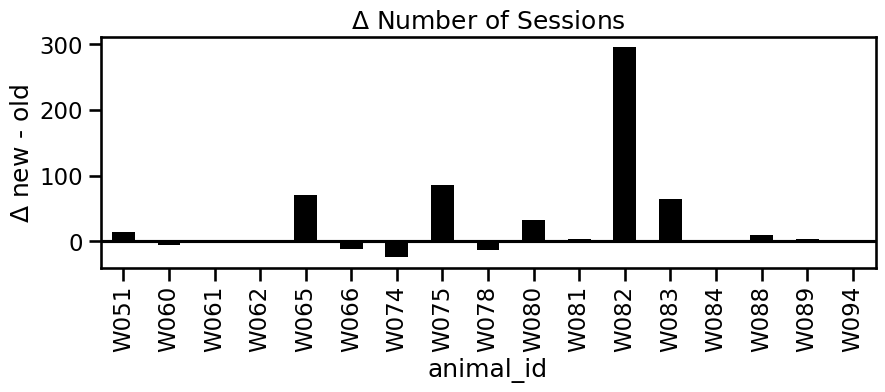

In [33]:
dd = summary.compute_and_plot_delta(
    "new", "old", "n_sessions", color="black", title="$\Delta$ Number of Sessions"
)

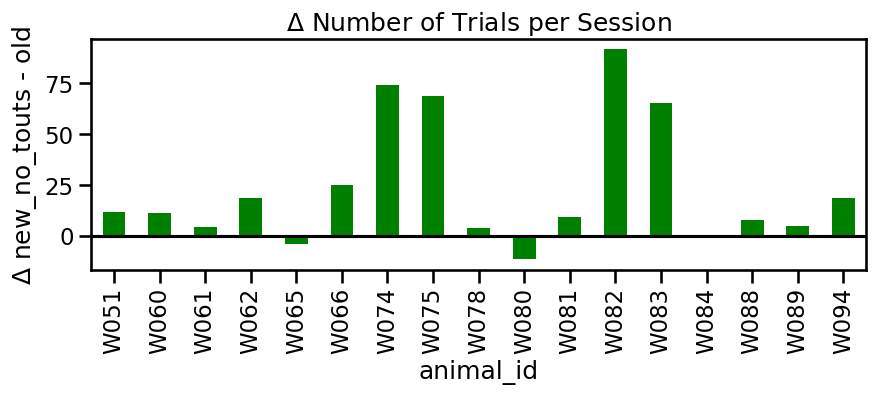

In [35]:
dd = summary.compute_and_plot_delta(
    "new_no_touts",
    "old",
    "n_trials_per_session",
    color="green",
    title="$\Delta$ Number of Trials per Session",
)

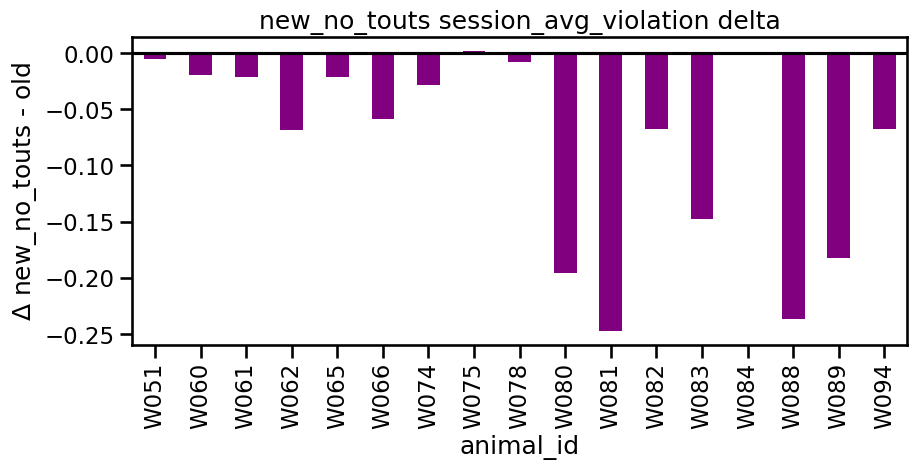

In [30]:
dd = summary.compute_and_plot_delta(
    "new_no_touts", "old", "session_avg_violation", color="purple"
)

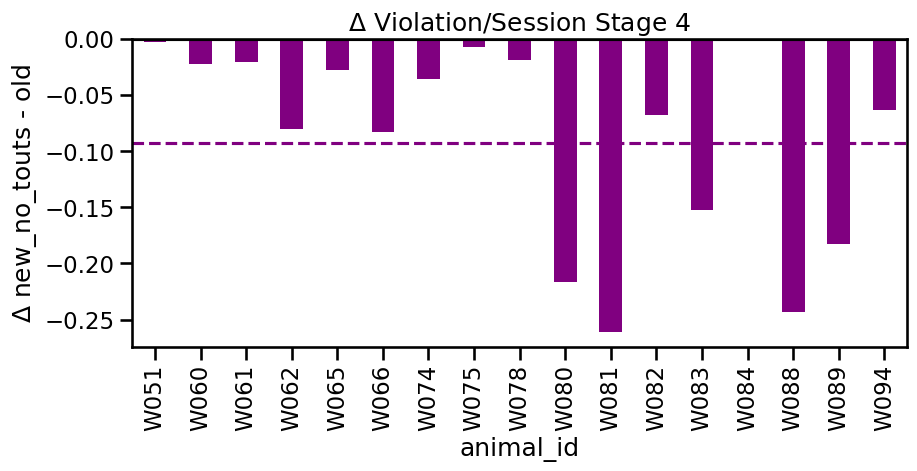

In [39]:
fig, ax = plt.subplots(figsize=(10, 4))
dd = summary.compute_and_plot_delta(
    "new_no_touts",
    "old",
    "session_avg_violation_stage_4",
    ax=ax,
    color="purple",
    title="$\Delta$ Violation/Session Stage 4",
)

ax.axhline(
    dd.delta_session_avg_violation_stage_4.mean(), color="purple", linestyle="--"
)